# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_29801/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

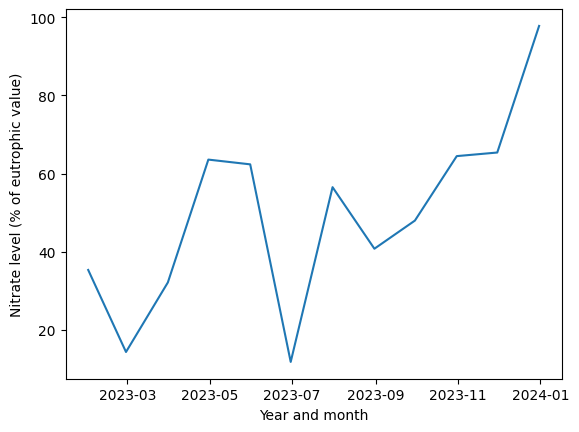

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_29801/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

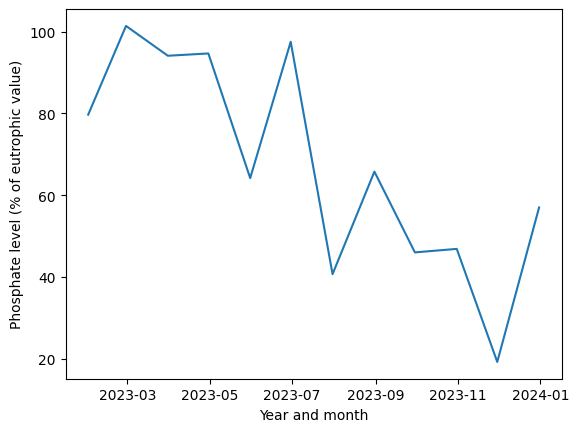

In [4]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

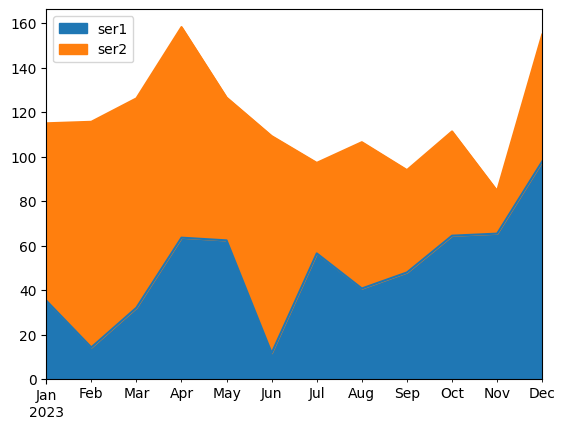

In [5]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [123]:
# ===========================
# LIBRARY IMPORTS
# ===========================

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import missingno as msno  # For missing data visualization
from datetime import datetime  # For handling date-related issues
import matplotlib.patches as mpatches  # For legend customization



In [129]:
# ===========================
# File Imports & Summary Stats
# ===========================

# Define base path for loading datasets
base_path = "./Datasets/"

# Dictionary mapping dataset names to CSV files
csv_files = {
    "Organized Generation": "organised_Gen.csv",
    "States": "states.csv",
    "IRENA Renewable Energy": "IRENA_RenewableEnergy_Statistics_2000-2022.csv"
}

# Load datasets into a dictionary
datasets = {}
for name, file in csv_files.items():
    encoding = "ISO-8859-1" if "IRENA" in name else "utf-8"  # Fix encoding for IRENA dataset
    file_path = os.path.join(base_path, file)
    
    if os.path.exists(file_path):
        datasets[name] = pd.read_csv(file_path, encoding=encoding)
        print(f"Loaded {name}: {datasets[name].shape[0]} rows, {datasets[name].shape[1]} columns")
    else:
        print(f"Warning: File not found -> {file}")

# Display dataset summaries
for name, df in datasets.items():
    print(f"\nDataset: {name}")
    print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")
    print("Column Names:", list(df.columns))
    print(df.info(), "\n")
    print(df.head(), "\n")

Loaded Organized Generation: 496774 rows, 7 columns
Loaded States: 51 rows, 3 columns
Loaded IRENA Renewable Energy: 35193 rows, 12 columns

Dataset: Organized Generation
Total Rows: 496774, Total Columns: 7
Column Names: ['Unnamed: 0', 'YEAR', 'MONTH', 'STATE', 'TYPE OF PRODUCER', 'ENERGY SOURCE', 'GENERATION (Megawatthours)']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496774 entries, 0 to 496773
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  496774 non-null  int64  
 1   YEAR                        496774 non-null  int64  
 2   MONTH                       496774 non-null  int64  
 3   STATE                       496774 non-null  object 
 4   TYPE OF PRODUCER            496774 non-null  object 
 5   ENERGY SOURCE               496774 non-null  object 
 6   GENERATION (Megawatthours)  496774 non-null  float64
dtypes: float64(1), int64(3), object(3

In [130]:
# ===========================
# DATA STANDARDIZATION
# ===========================

# Standardize column names
datasets["Organized Generation"].rename(columns={
    "GENERATION (Megawatthours)": "Generation_MWh",
    "ENERGY SOURCE": "Energy_Source",
    "TYPE OF PRODUCER": "Producer_Type",
    "YEAR": "Year",
    "MONTH": "Month",
    "STATE": "State"
}, inplace=True)

datasets["IRENA Renewable Energy"].rename(columns={
    "Electricity Generation (GWh)": "Generation_GWh",
    "Electricity Installed Capacity (MW)": "Installed_Capacity_MW",
    "Year": "Year",
    "Country": "Country",
    "Technology": "Technology"
}, inplace=True)

# Rename columns in States dataset
datasets["States"].rename(columns={"Code": "State_Abbreviation"}, inplace=True)

# Map state abbreviations to full names
state_mapping = datasets["States"].set_index("State_Abbreviation")["State"].to_dict()
datasets["Organized Generation"]["State_Full"] = datasets["Organized Generation"]["State"].map(state_mapping)

print("State mapping applied.")

State mapping applied.


In [131]:
# ===========================
# Identify & Remove Nulls, Duplicates, & Extreme Dates
# ===========================

removal_summary = {}  # Store removal counts per dataset

def clean_data(dataset_name, df, date_col="Year"):
    """
    Cleans a dataset by:
    - Removing rows with missing critical fields
    - Detecting duplicate records (without removing)
    - Detecting and removing white space-only values
    - Removing extreme date records
    """
    print(f"\nProcessing dataset: {dataset_name}")

    # Store original row count
    original_rows = df.shape[0]

    # Identify and remove rows where essential fields are missing
    critical_cols = ["State", "Year", "Month", "Energy_Source", "Generation_MWh"]
    if dataset_name == "IRENA Renewable Energy":
        critical_cols = ["Year", "Technology", "Generation_GWh"]

    missing_rows = df[df[critical_cols].isnull().any(axis=1)]
    missing_count = missing_rows.shape[0]

    if not missing_rows.empty:
        print(f"  Removing {missing_count} rows due to missing critical values")
        print(missing_rows.head())
        df = df.dropna(subset=critical_cols)

    # Identify duplicate rows (without removing)
    duplicate_count = df.duplicated().sum()
    print(f"  Duplicate Records Found: {duplicate_count}")

    # Identify & remove extreme date values
    if date_col in df.columns:
        valid_year_range = (2000, 2022)
        extreme_dates = df[(df[date_col] < valid_year_range[0]) | (df[date_col] > valid_year_range[1])]
        extreme_date_count = extreme_dates.shape[0]

        if not extreme_dates.empty:
            print(f"  Removing {extreme_date_count} rows due to extreme dates")
            print(extreme_dates.head())
            df = df[~df.index.isin(extreme_dates.index)]

    # Identify & remove white space-only values
    whitespace_rows = df[df.applymap(lambda x: isinstance(x, str) and x.strip() == "").any(axis=1)]
    whitespace_count = whitespace_rows.shape[0]

    if not whitespace_rows.empty:
        print(f"  Removing {whitespace_count} rows with white space-only values")
        print(whitespace_rows.head())
        df = df[~df.index.isin(whitespace_rows.index)]

    # Store removal counts
    removed_rows = original_rows - df.shape[0]
    removal_summary[dataset_name] = {
        "Missing Values Removed": missing_count,
        "Extreme Dates Removed": extreme_date_count,
        "White Space Rows Removed": whitespace_count,
        "Total Rows Removed": removed_rows
    }

    return df

# Clean each dataset
datasets["Organized Generation"] = clean_data("Organized Generation", datasets["Organized Generation"])
datasets["IRENA Renewable Energy"] = clean_data("IRENA Renewable Energy", datasets["IRENA Renewable Energy"])

# Print removal summary
print("\nData Removal Summary:")
for dataset, summary in removal_summary.items():
    print(f"\nDataset: {dataset}")
    for issue, count in summary.items():
        print(f"  {issue}: {count}")


Processing dataset: Organized Generation
  Duplicate Records Found: 0


/tmp/ipykernel_29801/784954289.py:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  whitespace_rows = df[df.applymap(lambda x: isinstance(x, str) and x.strip() == "").any(axis=1)]



Processing dataset: IRENA Renewable Energy
  Duplicate Records Found: 0

Data Removal Summary:

Dataset: Organized Generation
  Missing Values Removed: 0
  Extreme Dates Removed: 0
  White Space Rows Removed: 0
  Total Rows Removed: 0

Dataset: IRENA Renewable Energy
  Missing Values Removed: 0
  Extreme Dates Removed: 0
  White Space Rows Removed: 0
  Total Rows Removed: 0


/tmp/ipykernel_29801/784954289.py:49: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  whitespace_rows = df[df.applymap(lambda x: isinstance(x, str) and x.strip() == "").any(axis=1)]


In [134]:
# ===========================
# VISUALIZING DATA ISSUES
# ===========================

# Convert removal summary to DataFrame
#removal_df = pd.DataFrame(removal_summary).T

# Visualize missing, extreme, and whitespace removals
#fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Bar Chart: Missing Data Removed
#sns.barplot(x=removal_df.index, y=removal_df["Missing Values Removed"], ax=axes[0], color="blue", edgecolor="black")
#axes[0].set_title("Missing Data Removed")
#axes[0].set_ylabel("Rows Removed")
#axes[0].set_xlabel("Dataset")

# Bar Chart: Extreme Date Records Removed
#sns.barplot(x=removal_df.index, y=removal_df["Extreme Dates Removed"], ax=axes[1], color="red", edgecolor="black")
#axes[1].set_title("Extreme Date Rows Removed")
#axes[1].set_ylabel("Rows Removed")
#axes[1].set_xlabel("Dataset")

# Bar Chart: White Space Rows Removed
#sns.barplot(x=removal_df.index, y=removal_df["White Space Rows Removed"], ax=axes[2], color="orange", edgecolor="black")
#axes[2].set_title("White Space Rows Removed")
#axes[2].set_ylabel("Rows Removed")
#axes[2].set_xlabel("Dataset")

#plt.tight_layout()
#plt.show()

/tmp/ipykernel_29801/1254808987.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)  # Fix x-axis text
/tmp/ipykernel_29801/1254808987.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="State_Full", y="Generation_MWh", data=state_gen, palette="coolwarm_r", ax=axes[1, 2], edgecolor="black")
/tmp/ipykernel_29801/1254808987.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=90, fontsize=10)
/tmp/ipykernel_29801/1254808987.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. As

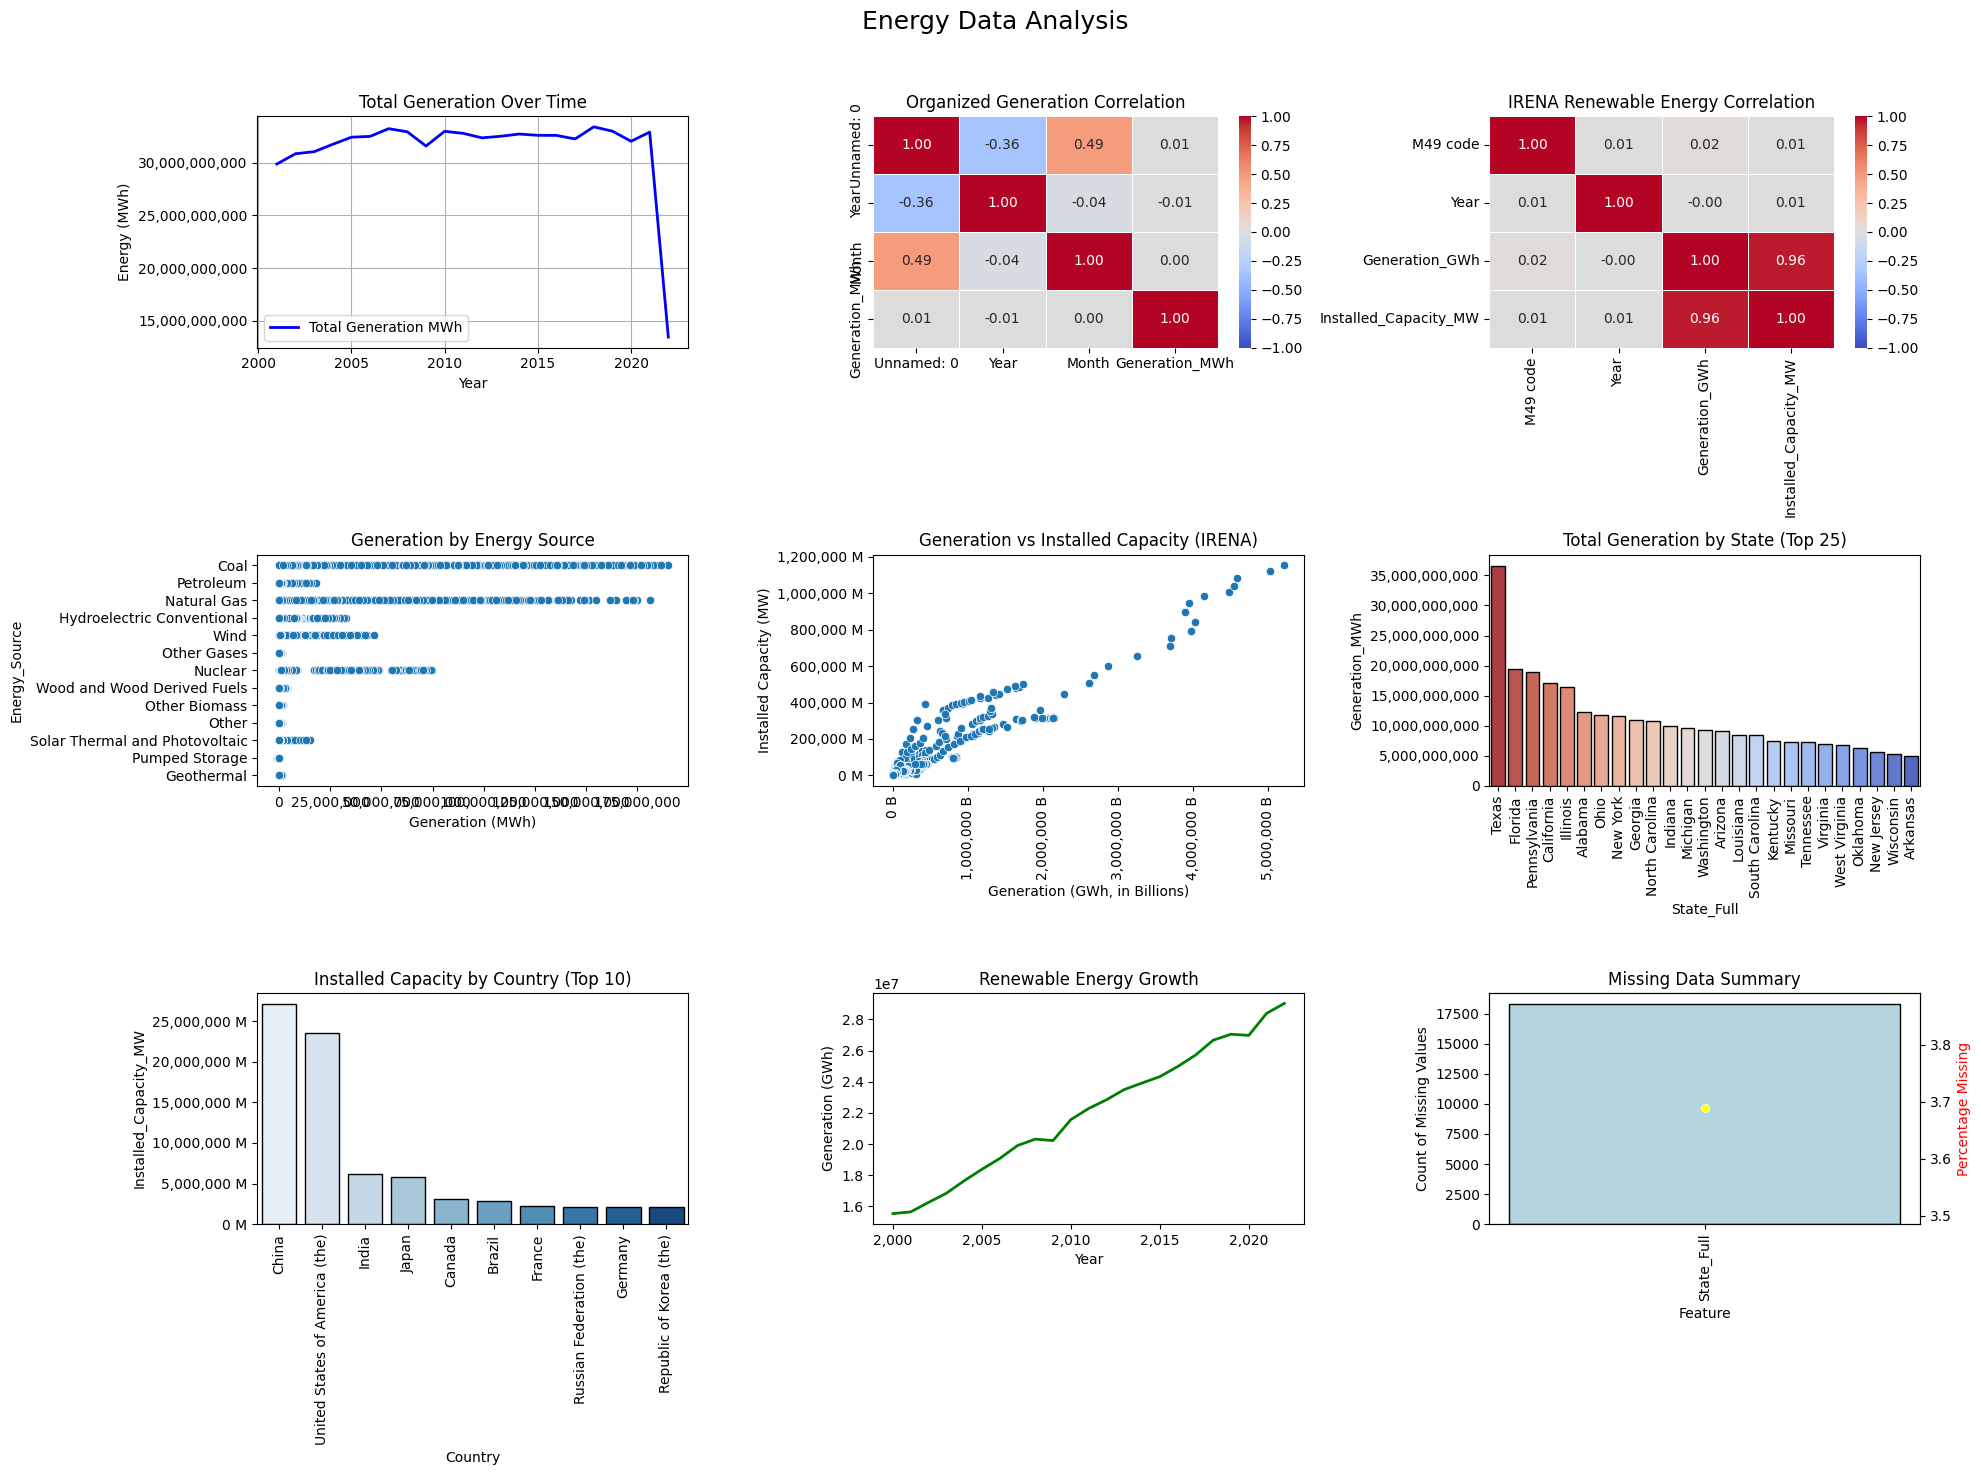

In [138]:
# ===========================
# DATA ANALYSIS & VISUALIZATION (FINAL)
# ===========================

# Aggregate total generation by year for time-series visualization
gen_by_year = datasets["Organized Generation"].groupby("Year")["Generation_MWh"].sum().reset_index()
gen_by_year["Year"] = gen_by_year["Year"].astype(int)

# Aggregate renewable energy growth over time
renewable_trend = datasets["IRENA Renewable Energy"].groupby("Year")["Generation_GWh"].sum().reset_index()

# Prepare improved subplot layout (3 rows x 3 columns)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))
fig.suptitle("Energy Data Analysis", fontsize=18)

# ----- TIME SERIES PLOT -----
axes[0, 0].plot(gen_by_year["Year"], gen_by_year["Generation_MWh"], color="blue", linewidth=2, label="Total Generation MWh")
axes[0, 0].set_title("Total Generation Over Time")
axes[0, 0].set_xlabel("Year")
axes[0, 0].set_ylabel("Energy (MWh)")
axes[0, 0].legend()
axes[0, 0].grid()
axes[0, 0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# ----- CORRELATION HEATMAPS (Matching Scales) -----
vmin, vmax = -1, 1  # Ensure consistent color scale
sns.heatmap(datasets["Organized Generation"].select_dtypes(include=["number"]).corr(), 
            ax=axes[0, 1], cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, vmin=vmin, vmax=vmax)
axes[0, 1].set_title("Organized Generation Correlation")

sns.heatmap(datasets["IRENA Renewable Energy"].select_dtypes(include=["number"]).corr(), 
            ax=axes[0, 2], cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, vmin=vmin, vmax=vmax)
axes[0, 2].set_title("IRENA Renewable Energy Correlation")

# ----- GENERATION VS ENERGY SOURCE -----
filtered_gen = datasets["Organized Generation"][datasets["Organized Generation"]["Energy_Source"] != "Total"]
sns.scatterplot(x="Generation_MWh", y="Energy_Source", data=filtered_gen, ax=axes[1, 0])
axes[1, 0].set_title("Generation by Energy Source")
axes[1, 0].set_xlabel("Generation (MWh)")
axes[1, 0].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# ----- GENERATION VS INSTALLED CAPACITY -----
sns.scatterplot(x="Generation_GWh", y="Installed_Capacity_MW", data=datasets["IRENA Renewable Energy"], ax=axes[1, 1])
axes[1, 1].set_title("Generation vs Installed Capacity (IRENA)")
axes[1, 1].set_xlabel("Generation (GWh, in Billions)")
axes[1, 1].set_ylabel("Installed Capacity (MW)")
axes[1, 1].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f} B"))  # Billion format
axes[1, 1].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f} M"))  # Million format
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=90)  # Fix x-axis text

# ----- TOTAL GENERATION BY STATE (Top 25 Sorted) -----
state_gen = datasets["Organized Generation"].groupby("State_Full")["Generation_MWh"].sum().reset_index()
state_gen = state_gen.sort_values("Generation_MWh", ascending=False).head(25)  # Display Top 25

sns.barplot(x="State_Full", y="Generation_MWh", data=state_gen, palette="coolwarm_r", ax=axes[1, 2], edgecolor="black")
axes[1, 2].set_xticklabels(axes[1, 2].get_xticklabels(), rotation=90, fontsize=10)
axes[1, 2].set_title("Total Generation by State (Top 25)")
axes[1, 2].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# ----- INSTALLED CAPACITY BY COUNTRY (Top 10 Countries) -----
state_capacity = datasets["IRENA Renewable Energy"].groupby("Country")["Installed_Capacity_MW"].sum().reset_index()
state_capacity = state_capacity.sort_values("Installed_Capacity_MW", ascending=False).head(10)  # Display Top 10

sns.barplot(x="Country", y="Installed_Capacity_MW", data=state_capacity, palette="Blues", ax=axes[2, 0], edgecolor="black")
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(), rotation=90, fontsize=10)
axes[2, 0].set_title("Installed Capacity by Country (Top 10)")
axes[2, 0].yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f} M"))

# ----- RENEWABLE ENERGY GROWTH -----
sns.lineplot(x="Year", y="Generation_GWh", data=renewable_trend, ax=axes[2, 1], color="green", linewidth=2)
axes[2, 1].set_title("Renewable Energy Growth")
axes[2, 1].set_xlabel("Year")
axes[2, 1].set_ylabel("Generation (GWh)")
axes[2, 1].xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# ----- MISSING DATA SUMMARY -----
missing_data = datasets["Organized Generation"].isnull().sum()
total_rows = len(datasets["Organized Generation"])

missing_summary = pd.DataFrame({
    "Feature": missing_data.index,
    "Missing Count": missing_data.values,
    "Missing Percentage": (missing_data.values / total_rows) * 100
}).query("`Missing Count` > 0")  # Remove non-missing columns

# Plot missing data visualization
ax2 = axes[2, 2].twinx()  # Secondary axis for percentage
sns.barplot(x="Feature", y="Missing Count", data=missing_summary, ax=axes[2, 2], color="lightblue", edgecolor="black", width=0.5)
sns.scatterplot(x="Feature", y="Missing Percentage", data=missing_summary, ax=ax2, color="yellow", marker="o")

axes[2, 2].set_title("Missing Data Summary")
axes[2, 2].set_ylabel("Count of Missing Values")
ax2.set_ylabel("Percentage Missing", color="red")
axes[2, 2].set_xticklabels(axes[2, 2].get_xticklabels(), rotation=90)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

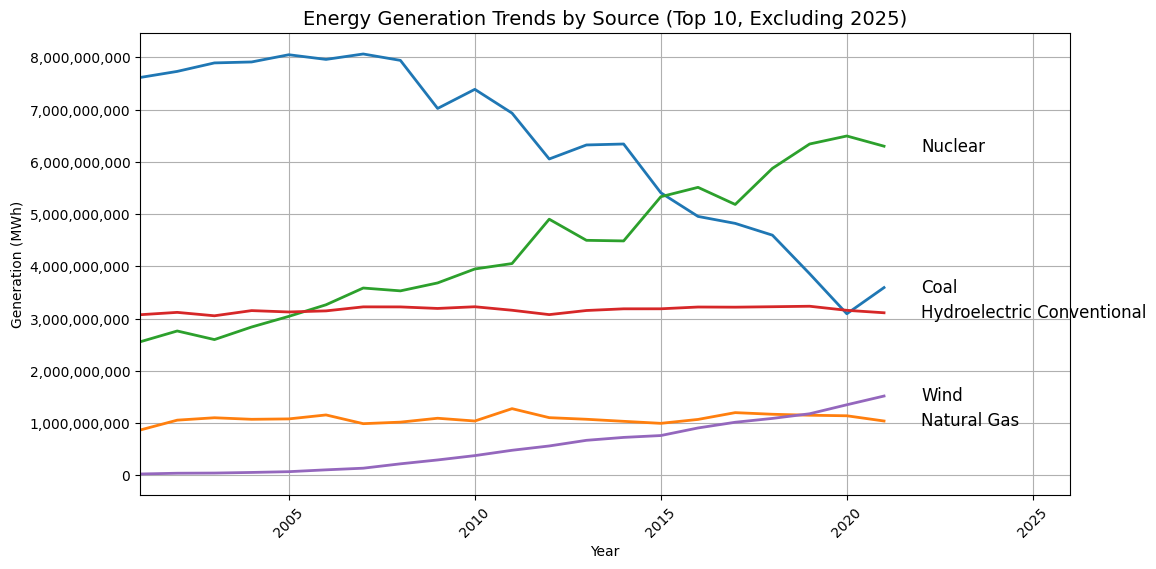

In [143]:
# Filter dataset to exclude 2025
filtered_data = datasets["Organized Generation"][datasets["Organized Generation"]["Year"] < 2022]

# Aggregate generation by year and energy source
energy_trend = filtered_data.groupby(["Year", "Energy_Source"])["Generation_MWh"].sum().reset_index()

# Remove "Total" energy source
energy_trend = energy_trend[energy_trend["Energy_Source"] != "Total"]

# Select a subset of top 10 energy sources
top_sources = energy_trend.groupby("Energy_Source")["Generation_MWh"].sum().nlargest(5).index
filtered_trend = energy_trend[energy_trend["Energy_Source"].isin(top_sources)]

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x="Year", y="Generation_MWh", hue="Energy_Source", data=filtered_trend, linewidth=2)

# Directly label the lines instead of using a legend
for line, name in zip(plt.gca().lines, top_sources):
    y_pos = line.get_ydata()[-1]  # Get last y-value
    plt.text(filtered_trend["Year"].max() + 1, y_pos, name, fontsize=12, verticalalignment="center")

# Formatting
plt.title("Energy Generation Trends by Source (Top 10, Excluding 2025)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Generation (MWh)")
plt.grid(True)
plt.xlim(filtered_trend["Year"].min(), filtered_trend["Year"].max() + 5)  # Add spacing for labels
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))  # Format large numbers

# Remove legend box
plt.legend([],[], frameon=False)

plt.show()